In [7]:
from Mnist_MoE.train_MoE import moe_train_loop, create_moe_model

nb_experts = 7

moe = create_moe_model(
        nb_experts=nb_experts, 
        k_training=3,
        k_inference=2, 
        tau=1, 
        lambda_balance=0.05 
    )

In [8]:


# Routing policy: 'hard' (tok_K), 'soft' (sotfmax or gumbell_softmax), 'hybrid' (soft with a thresholding)
# gumbell_softmax: True/False (only for 'soft' or 'hybrid' policies) False = softmax, True = gumbell_softmax
accuracies = {}
moe_train_info = moe_train_loop(moe, 
                                epochs=10,
                                selection_policy_t='soft',
                                selection_policy_i='hybrid', 
                                gumbell_softmax_t=True,
                                gumbell_softmax_i=False, 
                                threshold=None)
accuracies.update(moe_train_info[0])


Starting MoE training...
Number of Experts: 7 | k_training: 3 | k_inference: 2

experts: Expert 1: MNIST_CNN2, Expert 2: MNIST_CNN2, Expert 3: MNIST_CNN2, Expert 4: MNIST_CNN2, Expert 5: MNIST_CNN2, Expert 6: MNIST_CNN2, Expert 7: MNIST_CNN2

Epoch [1/10] - Train Loss: 0.3993, Train Acc: 89.51% | Test Loss: 0.1175, Test Acc: 95.98%
Expert Repartition: ['0.096', '0.035', '0.250', '0.051', '0.012', '0.376', '0.180']
 Lambda Balance: 0.050000

Epoch [2/10] - Train Loss: 0.1935, Train Acc: 95.88% | Test Loss: 0.0719, Test Acc: 97.56%
Expert Repartition: ['0.207', '0.154', '0.090', '0.094', '0.280', '0.131', '0.045']
 Lambda Balance: 0.050000

Epoch [3/10] - Train Loss: 0.1642, Train Acc: 96.66% | Test Loss: 0.0715, Test Acc: 97.69%
Expert Repartition: ['0.122', '0.250', '0.059', '0.176', '0.013', '0.123', '0.256']
 Lambda Balance: 0.050000

Epoch [4/10] - Train Loss: 0.1582, Train Acc: 96.86% | Test Loss: 0.0539, Test Acc: 98.09%
Expert Repartition: ['0.226', '0.274', '0.071', '0.109', '0

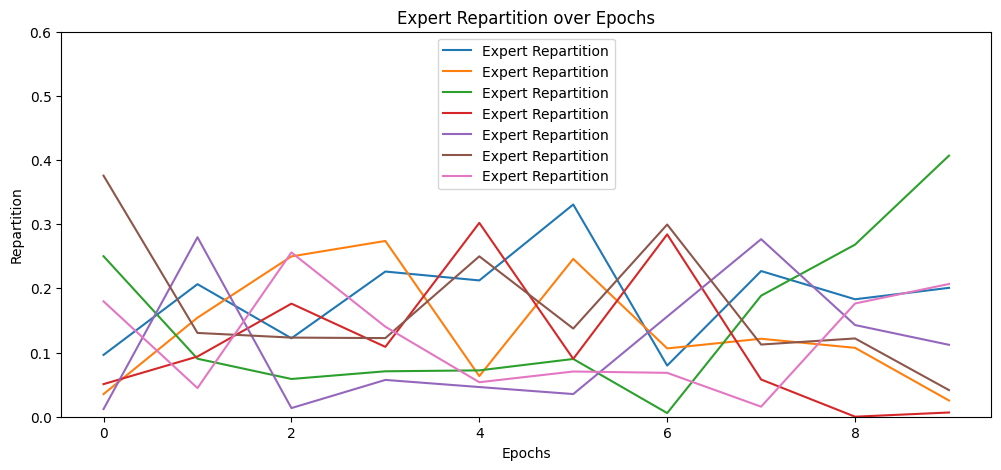

In [14]:
import matplotlib.pyplot as plt
informations = moe_train_info[1]

plt.figure(figsize=(12, 5))
plt.plot([informations[epoch]["repartition"] for epoch in informations], label="Expert Repartition")
plt.xlabel("Epochs")
plt.ylim(0, 0.6)
plt.ylabel("Repartition")
plt.title("Expert Repartition over Epochs")
plt.legend()
plt.show()

In [16]:
from Mnist_MoE.train_MoE import moe_eval_on_class
class_expert_acuation = moe_eval_on_class(moe, k=2, selection_policy='hard', gumbell_softmax=False)

Class 0 - Test Loss: 0.0314, Test Acc: 99.59% | Expert Repartition: [0.19948979591836735, 0.05459183673469388, 0.3704081632653061, 0.0, 0.036224489795918365, 0.03520408163265306, 0.3040816326530612]

Class 1 - Test Loss: 0.0120, Test Acc: 99.65% | Expert Repartition: [0.1356828193832599, 0.024669603524229075, 0.4392070484581498, 0.0013215859030837004, 0.22819383259911893, 0.003964757709251102, 0.1669603524229075]

Class 2 - Test Loss: 0.0821, Test Acc: 97.48% | Expert Repartition: [0.2005813953488372, 0.030038759689922482, 0.43023255813953487, 0.0, 0.16279069767441862, 0.05813953488372093, 0.1182170542635659]

Class 3 - Test Loss: 0.0161, Test Acc: 99.41% | Expert Repartition: [0.2400990099009901, 0.05, 0.404950495049505, 0.0, 0.04801980198019802, 0.018316831683168316, 0.2386138613861386]

Class 4 - Test Loss: 0.0815, Test Acc: 97.96% | Expert Repartition: [0.195010183299389, 0.04429735234215886, 0.3971486761710794, 0.0005091649694501018, 0.1104887983706721, 0.021384928716904276, 0.231

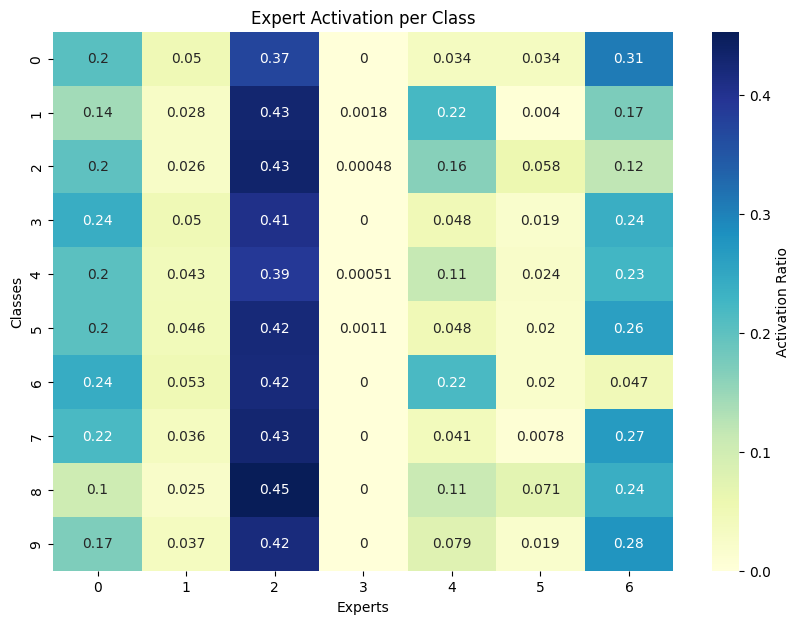

In [ ]:
import seaborn as sns

# Extract the repartition arrays for each class and stack into a 2D array
import numpy as np
repartition_matrix = np.stack([class_expert_acuation[c]['repartition'] for c in class_expert_acuation])

plt.figure(figsize=(10, nb_experts))
sns.heatmap(repartition_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Activation Ratio'})
plt.xlabel("Experts")
plt.ylabel("Classes")
plt.title("Expert Activation per Class")
plt.show()

In [12]:
from Mnist_MoE.train_dense import train_dense_model

accuracies.update(train_dense_model())

Using device: cuda
Training Dense Model for 10 epochs...

Starting training...
Epoch [1/10], Step [100/938], Loss: 0.8180, Train Acc: 72.39%
Epoch [1/10], Step [200/938], Loss: 0.2075, Train Acc: 83.20%
Epoch [1/10], Step [300/938], Loss: 0.1536, Train Acc: 87.30%
Epoch [1/10], Step [400/938], Loss: 0.1478, Train Acc: 89.47%
Epoch [1/10], Step [500/938], Loss: 0.1198, Train Acc: 90.89%
Epoch [1/10], Step [600/938], Loss: 0.1106, Train Acc: 91.90%
Epoch [1/10], Step [700/938], Loss: 0.1074, Train Acc: 92.64%
Epoch [1/10], Step [800/938], Loss: 0.1063, Train Acc: 93.17%
Epoch [1/10], Step [900/938], Loss: 0.0964, Train Acc: 93.61%

Epoch 1 - Test Accuracy: 98.14%

Best model saved to ./Mnist_MoE/Mnist_MoE_experts/dense_model.pth with accuracy 98.14%

Epoch [2/10], Step [100/938], Loss: 0.0762, Train Acc: 97.73%
Epoch [2/10], Step [200/938], Loss: 0.0744, Train Acc: 97.84%
Epoch [2/10], Step [300/938], Loss: 0.0900, Train Acc: 97.72%
Epoch [2/10], Step [400/938], Loss: 0.0782, Train Acc: 

In [13]:
print("\nExpert Accuracies:")
for expert, acc in accuracies.items():
    print(f"{expert}: {acc:.2f}%")


Expert Accuracies:
MoE_Model: 98.50%
Dense_Model: 99.23%
